# Linear Discriminant Analysis in Python

[[ 1.07646534 -0.05208045]
 [-0.05208045  0.45007299]]


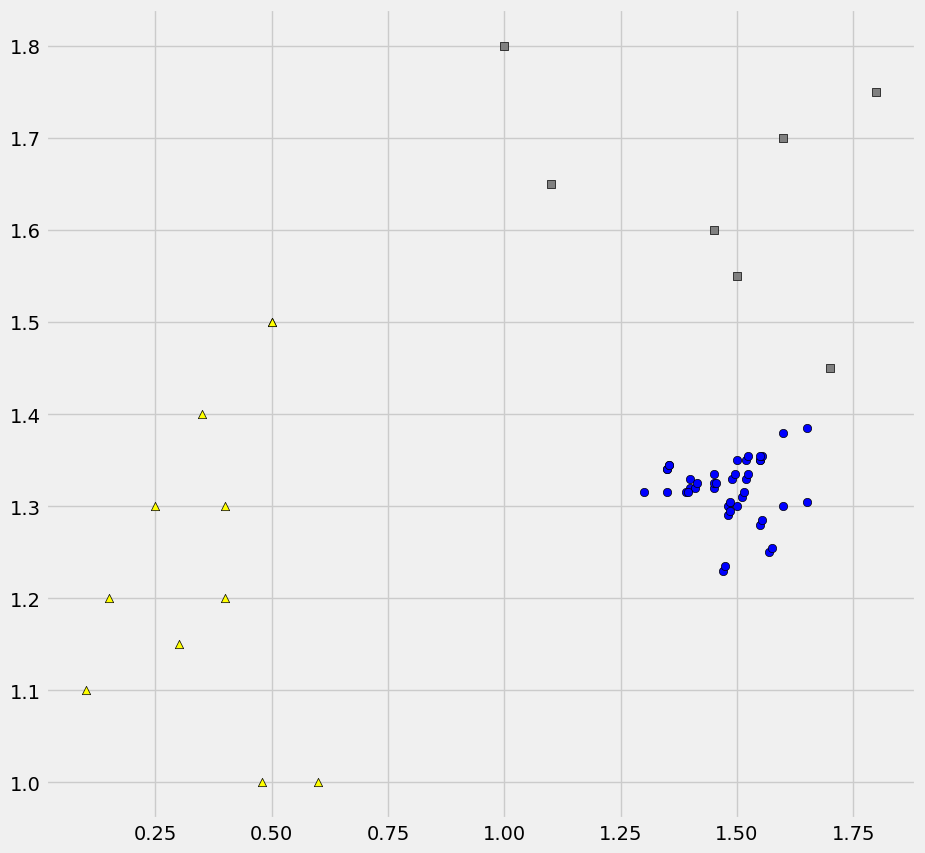

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)

rectangles = np.array([[1,1.5,1.7,1.45,1.1,1.6,1.8],
                       [1.8,1.55,1.45,1.6,1.65,1.7,1.75]])
triangles = np.array([[0.1,0.5,0.25,0.4,0.3,0.6,0.35,0.15,0.4,0.5,0.48],
                      [1.1,1.5,1.3,1.2,1.15,1.0,1.4,1.2,1.3,1.5,1.0]])
circles = np.array([[1.5,1.55,1.52,1.4,1.3,1.6,1.35,1.45,1.4,1.5,1.48,
                     1.51,1.52,1.49,1.41,1.39,1.6,1.35,1.55,1.47,1.57,1.48,
                    1.55,1.555,1.525,1.45,1.35,1.65,1.355,1.455,1.45,
                    1.55,1.485,1.515,1.525,1.495,1.415,1.395,1.65,1.355,
                    1.555,1.475,1.575,1.485], 
                    [1.3,1.35,1.33,1.32,1.315,1.30,1.34,1.32,1.33,1.35,
                      1.30,1.31,1.35,1.33,1.32,1.315,1.38,1.34,1.28,1.23,1.25,1.29,
                     1.35,1.355,1.335,1.325,1.3155,1.305,1.345,1.325, 
                     1.335,1.355,1.305,1.315,1.355,1.335,1.325,1.3155,
                     1.385,1.345,1.285,1.235,1.255,1.295]])

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)

ax0.scatter(rectangles[0], rectangles[1], marker='s', c='grey', edgecolors='black')
ax0.scatter(triangles[0], triangles[1], marker='^', c='yellow', edgecolors='black')
ax0.scatter(circles[0], circles[1], marker='o', c='blue', edgecolors='black')

mean_rectangles = np.mean(rectangles, axis=1).reshape(2, 1)
mean_triangles = np.mean(triangles, axis=1).reshape(2, 1)
mean_circles = np.mean(circles, axis=1).reshape(2, 1)

scatter_rectangles = np.dot((rectangles - mean_rectangles), (rectangles - mean_rectangles).T)
scatter_triangles = np.dot((triangles - mean_triangles), (triangles - mean_triangles).T)
scatter_circles = np.dot((circles - mean_circles), (circles - mean_circles).T)

SW = scatter_triangles + scatter_circles + scatter_rectangles
print(SW)

plt.show()

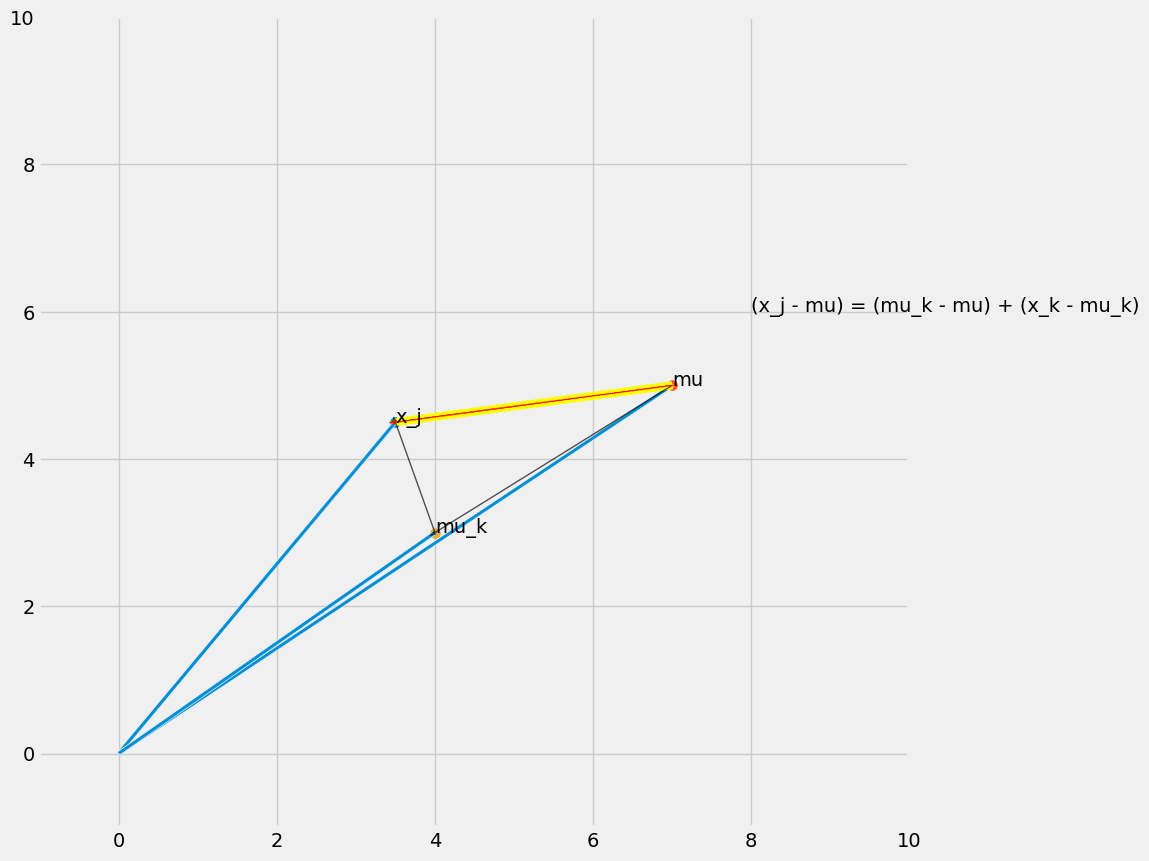

In [5]:
x_j = np.array([3.5, 4.5])
mu = np.array([7, 5])
mu_k = np.array([4, 3])

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-1, 10)
ax0.set_ylim(-1, 10)

for i in [x_j, mu, mu_k]:
    ax0.scatter(i[0], i[1], s=50)

ax0.annotate('x_j', x_j)
ax0.annotate('mu', mu)
ax0.annotate('mu_k', mu_k)
ax0.annotate('(x_j - mu) = (mu_k - mu) + (x_k - mu_k)', np.array(mu) + np.array([1, 1]))

for i in [x_j, mu, mu_k]:
    ax0.arrow(0, 0, i[0], i[1], head_width=0.01, width=0.05)

ax0.arrow(mu[0], mu[1], (x_j - mu)[0], (x_j - mu)[1], head_width=0.05, width=0.1, color='yellow')
ax0.arrow(mu[0], mu[1], (mu_k - mu)[0], (mu_k - mu)[1], head_width=0.05, width=0.01, alpha=0.5, color='black')
ax0.arrow(mu_k[0], mu_k[1], (x_j - mu_k)[0], (x_j - mu_k)[1], head_width=0.05, width=0.01, alpha=0.5, color='black')

mu_k_minus_mu = mu_k - mu
x_j_minus_mu_k = x_j - mu_k
res = (mu_k - mu) + (x_j - mu_k)

ax0.arrow(mu[0], mu[1], res[0], res[1], head_width=0.05, width=0.01, linestyle='-.', color='red')

plt.show()


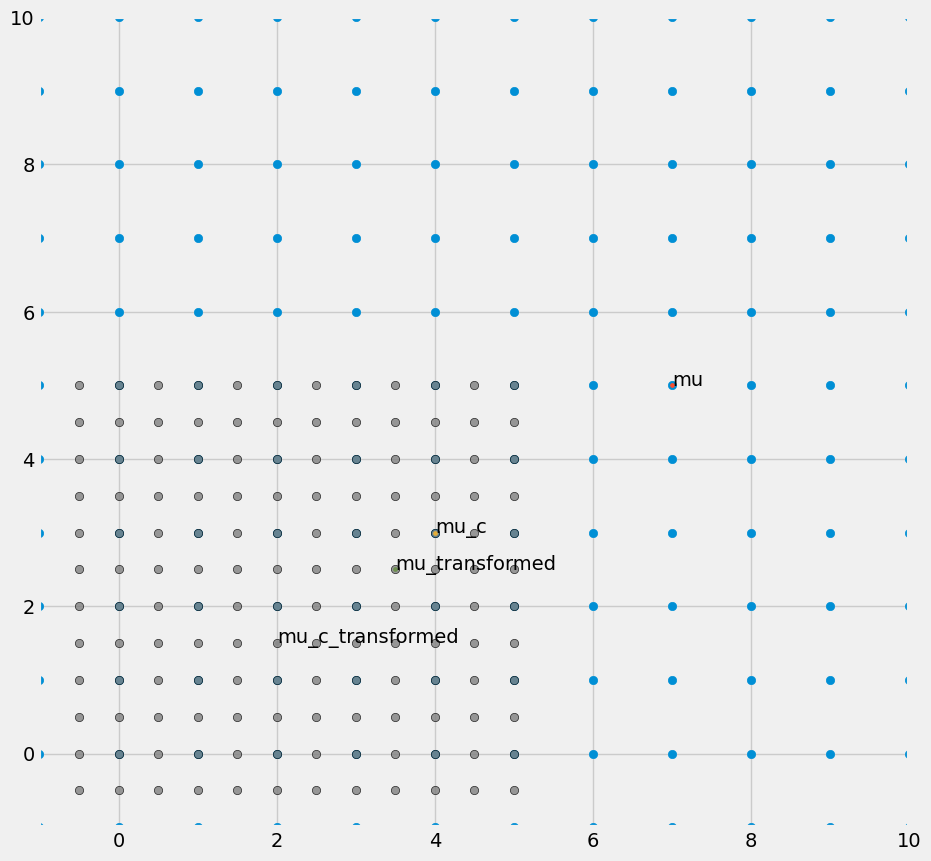

In [6]:
mu = np.array([7, 5]).reshape(2, 1)
mu_c = np.array([4, 3]).reshape(2, 1)

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-1, 10)
ax0.set_ylim(-1, 10)

X, Y = np.meshgrid(np.linspace(-1, 10, num=12), np.linspace(-1, 10, num=12))
data = np.array([X.reshape(1, 144), Y.reshape(1, 144)]).reshape(2, 144)

ax0.scatter(X, Y)

w = np.array([[0.5, 0], [0, 0.5]])


data_trans = np.dot(data.T, w)
mu_trans = np.dot(mu.reshape(2, 1).T, w).reshape(2, 1)
mu_c_trans = np.dot(mu_c.reshape(2, 1).T, w).reshape(2, 1)

ax0.scatter(data_trans[:, 0], data_trans[:, 1], alpha=0.8, color='grey', edgecolor='black')

for i in [mu, mu_c, mu_trans, mu_c_trans]:
    ax0.scatter(i[0], i[1], s=8)

ax0.annotate('mu', [mu[0], mu[1]])
ax0.annotate('mu_c', mu_k)
ax0.annotate('mu_c_transformed', mu_c_trans)
ax0.annotate('mu_transformed', mu_trans)

plt.show()

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physical Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'doi': '

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1, 1))

mu = np.mean(X_train, axis=0).values.reshape(13, 1)

mu_k = []

for i, orchid in enumerate(np.unique(y)):
    mu_k.append(np.mean(X_train.where(y==orchid), axis=0))

mu_k = np.array(mu_k).all

data_SW = []
Nc = []

for i, orchid in enumerate(np.unique(y)):
    a = np.array(X_train.where(y == orchid).dropna().values - mu_k[:, i].reshape(1, 13))
    data_SW.append(np.dot(a.T, a))
    Nc.append(np.sum(y==orchid))

SW = np.sum(data_SW, axis=0)
SB = np.dot(Nc * np.array(mu_k - mu), np.array(mu_k - mu).T)

eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW), SB))

eigen_pairs = [[np.abs(eigval[i]), eigvec[:, i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].read, eigen_pairs[1][1][:, np.newaxis].real))

Y = X_train.dot(w)

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3, 3)
ax0.set_ylim(-4, 3)

for l, c, m in zip(np.unique(y_train), ['r', 'g', 'b'], ['s', 'x', 'o']):
    ax0.scatter(Y[0][y_train == l],
                Y[1][y_train==l],
                c=c, marker=m, label=l, edgecolors='black')
    
ax0.legend(loc='upper right')

means = []

for m, target in zip(['s', 'x', 'o'], np.unique(y_train)):
    means.append(np.mean(Y[y_train==target], axis=0))
    ax0.scatter(np.mean(Y[y_train==target], axis=0)[0], np.mean(y_train==target), axis=0[1],
                marker=m, c='black', s=100)
    
mesh_x, mesh_y = np.meshgrid(np.linspace(-3, 3), np.linspace(-4, 4))
mesh = []


for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j], mesh_y[i][j]]
        mesh.append((mesh_x[i][j], mesh_y[i][j]))

NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means, ['r', 'g', 'b'])
predictions = NN.predict(np.array(mesh))

ax0.scatter(np.array(mesh)[:, 0], np.array(mesh)[:, 1], color=predictions, alpha=0.3)


plt.show()

<>:54: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:54: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


TypeError: 'builtin_function_or_method' object is not subscriptable

In [9]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physical Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'doi': '

(124, 2)


C:\Users\kylec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

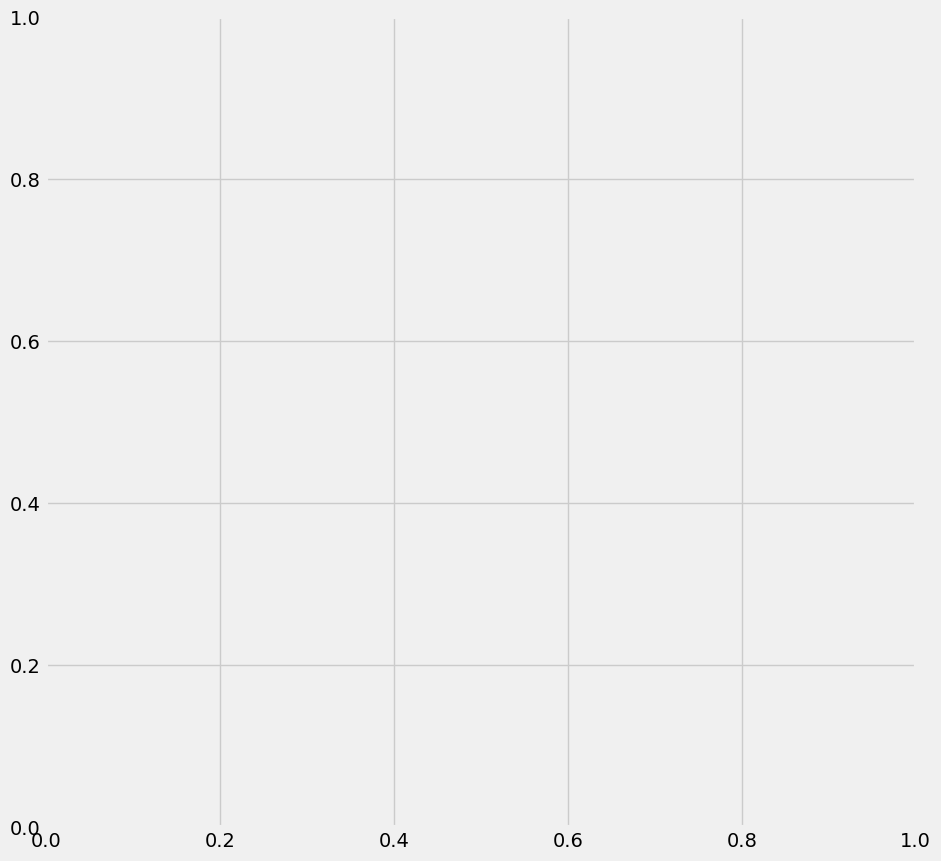

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2)

data_projected = LDA.fit_transform(X_train, y_train)

print(data_projected.shape)

markers = ['s', 'x', 'o']
colors = ['r', 'g', 'b']

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)

for l, m, c in zip(np.unique(y_train), markers, colors):
    ax0.scatter(data_projected[:, 0][y_train==l], data_projected[:, 1][y_train==l], c=c, marker=m)

